In [81]:
import pandas as pd

df = pd.read_csv('updated_multiTimeline.csv', parse_dates = True)

In [93]:
df['Mese'] = pd.to_datetime(df['Mese'])

In [94]:
import matplotlib.dates as mdates
ordinalMese = mdates.date2num(df['Mese'])
ordinalMese

array([12418., 12449., 12478., 12509., 12539., 12570., 12600., 12631.,
       12662., 12692., 12723., 12753., 12784., 12815., 12843., 12874.,
       12904., 12935., 12965., 12996., 13027., 13057., 13088., 13118.,
       13149., 13180., 13208., 13239., 13269., 13300., 13330., 13361.,
       13392., 13422., 13453., 13483., 13514., 13545., 13573., 13604.,
       13634., 13665., 13695., 13726., 13757., 13787., 13818., 13848.,
       13879., 13910., 13939., 13970., 14000., 14031., 14061., 14092.,
       14123., 14153., 14184., 14214., 14245., 14276., 14304., 14335.,
       14365., 14396., 14426., 14457., 14488., 14518., 14549., 14579.,
       14610., 14641., 14669., 14700., 14730., 14761., 14791., 14822.,
       14853., 14883., 14914., 14944., 14975., 15006., 15034., 15065.,
       15095., 15126., 15156., 15187., 15218., 15248., 15279., 15309.,
       15340., 15371., 15400., 15431., 15461., 15492., 15522., 15553.,
       15584., 15614., 15645., 15675., 15706., 15737., 15765., 15796.,
      

In [8]:
df.describe()

,Cupcake: (Tutto il mondo)
count,209.000000
mean,50.205742
std,28.097029
min,5.000000
25%,25.000000
50%,52.000000
75%,74.000000
max,100.000000


In [95]:
import matplotlib.pyplot as plt
grouped = df.groupby(df['Mese'].map(lambda x : x.year))

In [107]:
for key, value in grouped:
    print(value['Cupcake: (Tutto il mondo)'])

0     5
1     7
2     5
3     5
4     6
5     6
6     5
7     6
8     6
9     8
10    6
11    7
Name: Cupcake: (Tutto il mondo), dtype: int64
12     7
13     9
14     9
15     8
16     7
17     7
18     7
19     8
20     9
21    12
22     8
23     7
Name: Cupcake: (Tutto il mondo), dtype: int64
24    10
25    13
26    12
27    12
28    12
29    10
30    11
31    12
32    12
33    17
34    11
35    12
Name: Cupcake: (Tutto il mondo), dtype: int64
36    13
37    16
38    16
39    16
40    17
41    17
42    20
43    20
44    19
45    23
46    19
47    18
Name: Cupcake: (Tutto il mondo), dtype: int64
48    20
49    25
50    25
51    24
52    26
53    25
54    25
55    26
56    27
57    32
58    29
59    28
Name: Cupcake: (Tutto il mondo), dtype: int64
60    29
61    37
62    35
63    35
64    36
65    36
66    37
67    39
68    37
69    45
70    38
71    36
Name: Cupcake: (Tutto il mondo), dtype: int64
72    37
73    47
74    47
75    47
76    50
77    49
78    58
79    62
80    59
81    6

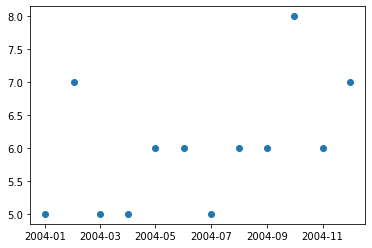

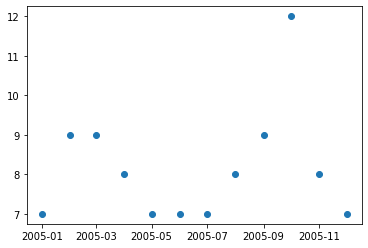

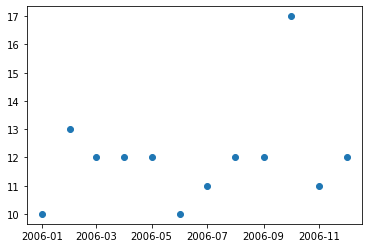

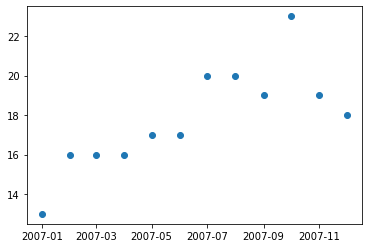

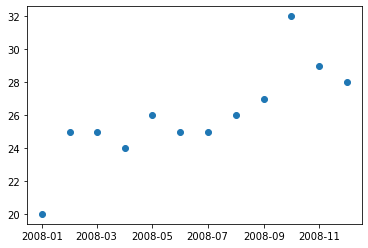

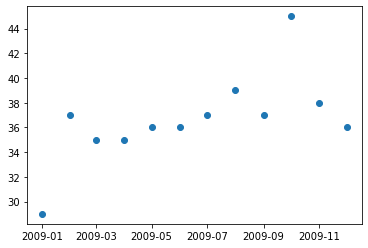

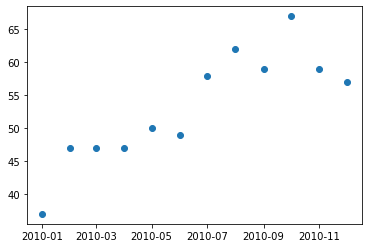

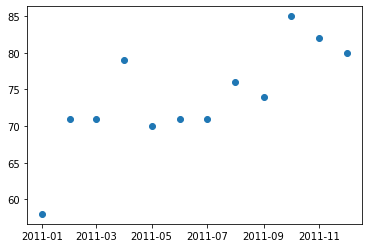

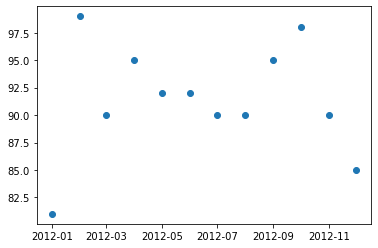

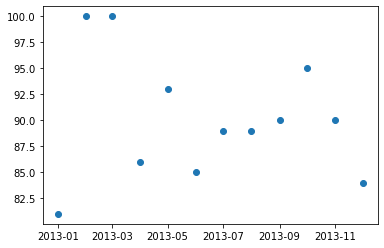

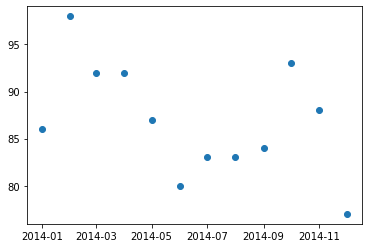

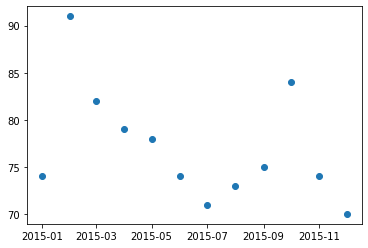

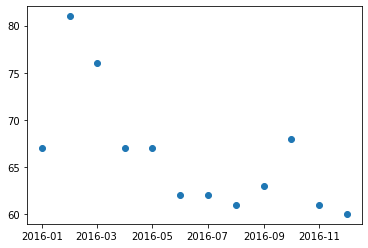

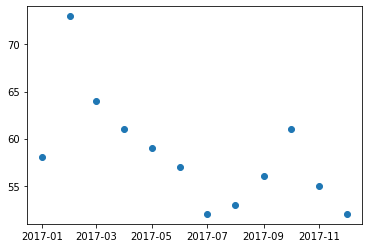

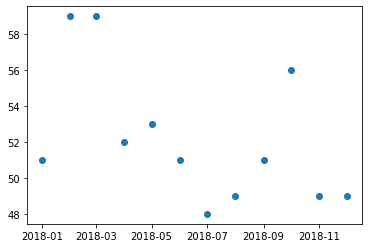

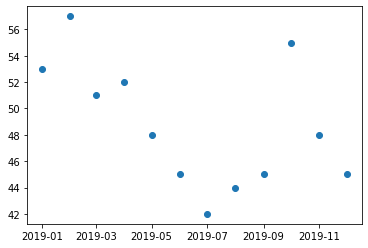

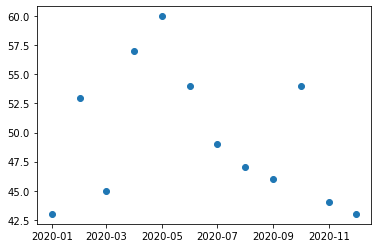

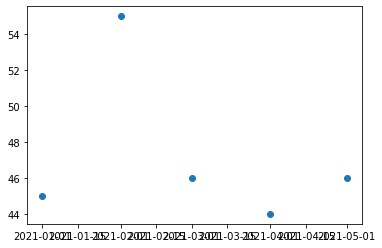

In [117]:
import matplotlib.pyplot as plt

for key, value in grouped:
    #print(value.index)
    plt.scatter(value['Mese'], value['Cupcake: (Tutto il mondo)'])
    plt.show()

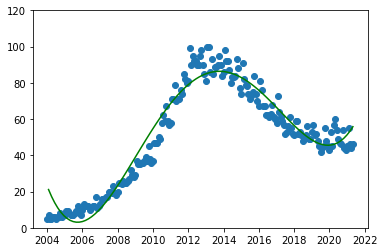

The model performance for the training set
------------------------------------------
R2 score of training set is: 0.9476635026738297
RMSE of training test is: 6.690372615458475


The model performance for the test set
------------------------------------------
R2 score of test set is: 0.9161189033922323
RMSE of test test is: 7.352460809898608


In [145]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(ordinalMese, df['Cupcake: (Tutto il mondo)'], test_size = 0.33)

mymodel = np.poly1d(np.polyfit(X_train, Y_train, 4)) 
myline = np.linspace(X_train.min(), X_train.max(), 100)
myline_dates = mdates.num2date(myline)

cx = plt.subplot()
cx.scatter(df['Mese'], df['Cupcake: (Tutto il mondo)'])
cx.plot(myline_dates, mymodel(myline), '-g')

cx.set_ylim(0, 120)
plt.show()

print('The model performance for the training set')
print('------------------------------------------')
print('R2 score of training set is: ' + str(r2_score(Y_train, mymodel(X_train))))
print('RMSE of training test is: ' + str(np.sqrt(mean_squared_error(Y_train, mymodel(X_train)))))
print('\n')
print('The model performance for the test set')
print('------------------------------------------')
print('R2 score of test set is: ' + str(r2_score(y_test, mymodel(x_test))))
print('RMSE of test test is: ' + str(np.sqrt(mean_squared_error(y_test, mymodel(x_test)))))


In [146]:
import datetime as DT
xx = mdates.date2num(DT.datetime(2021, 11, 1))
print(mymodel(xx))


65.73284683466773


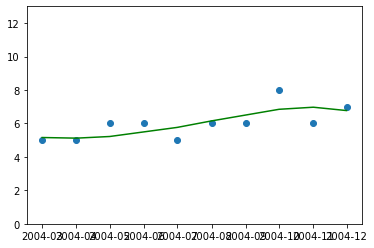

The model performance for the training set
------------------------------------------
R2 score of training set is: -1.3577401407356522
RMSE of training test is: 1.5354934518700014


The model performance for the test set
------------------------------------------
R2 score of test set is: -0.9096194693579283
RMSE of test test is: 0.9771436612284624


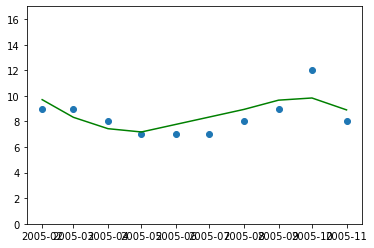

The model performance for the training set
------------------------------------------
R2 score of training set is: -1.2985173909587941
RMSE of training test is: 2.1103026903699535


The model performance for the test set
------------------------------------------
R2 score of test set is: 0.0
RMSE of test test is: 2.538670357981598


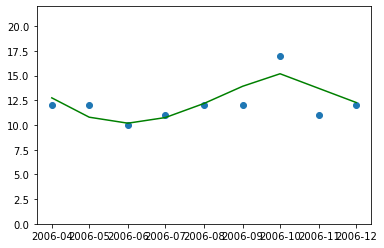

The model performance for the training set
------------------------------------------
R2 score of training set is: -0.7134937842286941
RMSE of training test is: 2.5136643231233777


The model performance for the test set
------------------------------------------
R2 score of test set is: -79.12334933245293
RMSE of test test is: 10.0077063638761


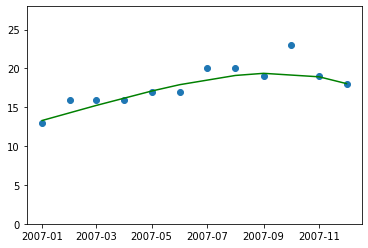

The model performance for the training set
------------------------------------------
R2 score of training set is: -2.1336212388866413
RMSE of training test is: 3.6426538997564157


The model performance for the test set
------------------------------------------
R2 score of test set is: 0.4762589082249201
RMSE of test test is: 2.1330730730089877


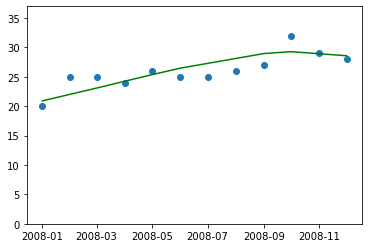

The model performance for the training set
------------------------------------------
R2 score of training set is: 0.06176607373639198
RMSE of training test is: 3.1176140043127636


The model performance for the test set
------------------------------------------
R2 score of test set is: -0.8987662483985586
RMSE of test test is: 2.25896752800281


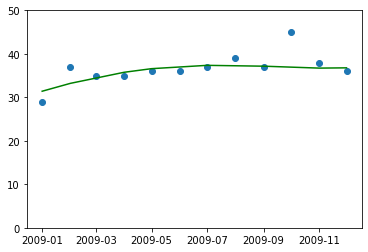

The model performance for the training set
------------------------------------------
R2 score of training set is: 0.16994130715002487
RMSE of training test is: 2.407787611662217


The model performance for the test set
------------------------------------------
R2 score of test set is: -0.14539212869830798
RMSE of test test is: 4.170808429382193


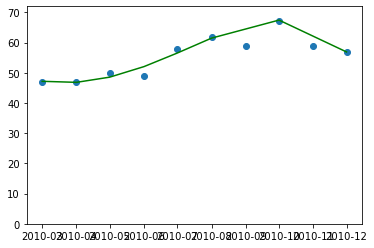

The model performance for the training set
------------------------------------------
R2 score of training set is: -1.194534732994228
RMSE of training test is: 10.39454404939258


The model performance for the test set
------------------------------------------
R2 score of test set is: -0.17414778319993784
RMSE of test test is: 9.975421025009156


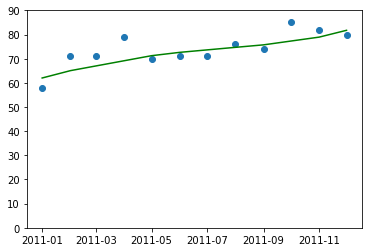

The model performance for the training set
------------------------------------------
R2 score of training set is: -0.20919018436323444
RMSE of training test is: 7.593632656168044


The model performance for the test set
------------------------------------------
R2 score of test set is: -0.2488878953794751
RMSE of test test is: 6.587780685818006


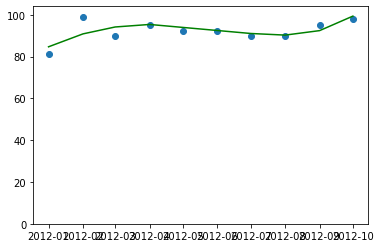

The model performance for the training set
------------------------------------------
R2 score of training set is: -0.7915393434986955
RMSE of training test is: 7.262123616700754


The model performance for the test set
------------------------------------------
R2 score of test set is: -107.58804188550285
RMSE of test test is: 29.81718620087339


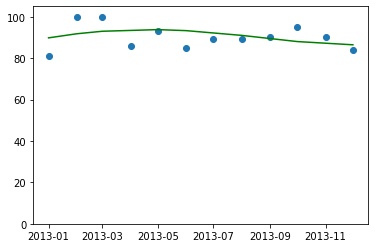

The model performance for the training set
------------------------------------------
R2 score of training set is: -0.08258183589239576
RMSE of training test is: 7.0843360520463765


The model performance for the test set
------------------------------------------
R2 score of test set is: -6.479610712915517
RMSE of test test is: 4.4834644853015675


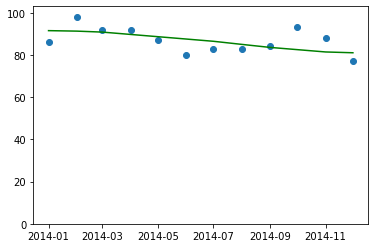

The model performance for the training set
------------------------------------------
R2 score of training set is: -1.0729949355285173
RMSE of training test is: 8.606810001346426


The model performance for the test set
------------------------------------------
R2 score of test set is: -0.7225406182852248
RMSE of test test is: 6.756280514051977


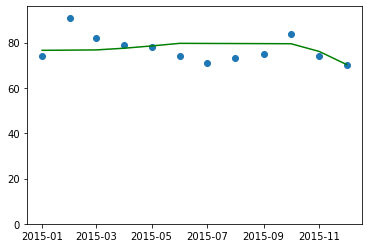

The model performance for the training set
------------------------------------------
R2 score of training set is: -0.6424918588632464
RMSE of training test is: 5.638937473512245


The model performance for the test set
------------------------------------------
R2 score of test set is: -0.6280345150332223
RMSE of test test is: 10.107381748916714


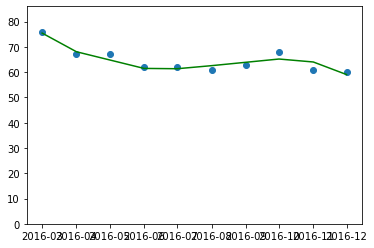

The model performance for the training set
------------------------------------------
R2 score of training set is: -0.8843918024698283
RMSE of training test is: 6.99748120699884


The model performance for the test set
------------------------------------------
R2 score of test set is: -4.413953475435892
RMSE of test test is: 15.909189953502597


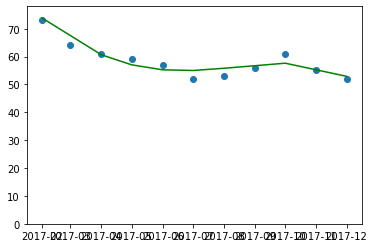

The model performance for the training set
------------------------------------------
R2 score of training set is: -0.8006337920460869
RMSE of training test is: 8.747967544633363


The model performance for the test set
------------------------------------------
R2 score of test set is: -13.275156277993094
RMSE of test test is: 13.190089731993517


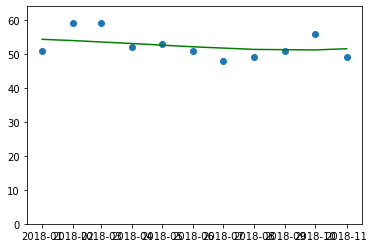

The model performance for the training set
------------------------------------------
R2 score of training set is: 0.06007067173167968
RMSE of training test is: 3.1415375131959453


The model performance for the test set
------------------------------------------
R2 score of test set is: 0.2779753997114115
RMSE of test test is: 3.6732594133675063


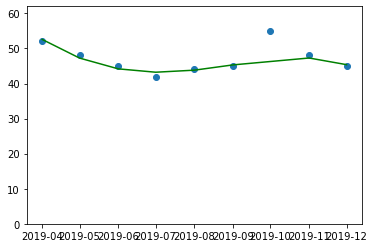

The model performance for the training set
------------------------------------------
R2 score of training set is: -1.6915439415041136
RMSE of training test is: 4.743376975954046


The model performance for the test set
------------------------------------------
R2 score of test set is: -65.0837790661918
RMSE of test test is: 18.177428182527883


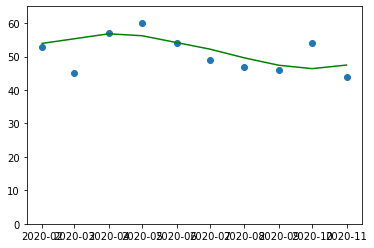

The model performance for the training set
------------------------------------------
R2 score of training set is: -0.7728714253171465
RMSE of training test is: 7.037726582128477


The model performance for the test set
------------------------------------------
R2 score of test set is: -1.974355989811364
RMSE of test test is: 7.844232884050714


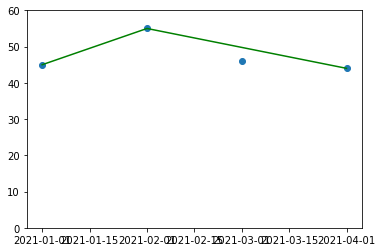

The model performance for the training set
------------------------------------------
R2 score of training set is: -2.27027027027027
RMSE of training test is: 8.981462390204987


The model performance for the test set
------------------------------------------
R2 score of test set is: 0.0
RMSE of test test is: 19.54393701400436


In [169]:
import operator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

for key, value in grouped:
    ordinalValue = mdates.date2num(value['Mese'])
    
    X_train, x_test, Y_train, y_test = train_test_split(ordinalValue, value['Cupcake: (Tutto il mondo)'], test_size = 0.33)
    
    X_train = np.asarray(X_train[:, np.newaxis])
    Y_train = np.asarray(Y_train)
    Y_train = Y_train[:, np.newaxis]
    x_test = np.asarray(x_test[:, np.newaxis])
    y_test = np.asarray(y_test)
    y_test = y_test[:, np.newaxis]
    
    poly_features = PolynomialFeatures(degree = 50)
    X_train_poly = poly_features.fit_transform(X_train)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
    
    Y_train_predicted = poly_model.predict(X_train_poly)
    
    y_test_predicted = poly_model.predict(poly_features.fit_transform(x_test))
    
    myline_dates = mdates.num2date(X_train)
    
    cx = plt.subplot()
    cx.scatter(value['Mese'], value['Cupcake: (Tutto il mondo)'])
    
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(myline_dates, Y_train_predicted), key=sort_axis)
    myline_dates, Y_train_predicted = zip(*sorted_zip)
    cx.plot(myline_dates, Y_train_predicted, '-g')

    cx.set_ylim(0, value['Cupcake: (Tutto il mondo)'].max() + 5)
    plt.show()
    
    print('The model performance for the training set')
    print('------------------------------------------')
    print('R2 score of training set is: ' + str(r2_score(Y_train, Y_train_predicted)))
    print('RMSE of training test is: ' + str(np.sqrt(mean_squared_error(Y_train, Y_train_predicted))))
    print('\n')
    print('The model performance for the test set')
    print('------------------------------------------')
    print('R2 score of test set is: ' + str(r2_score(y_test, y_test_predicted)))
    print('RMSE of test test is: ' + str(np.sqrt(mean_squared_error(y_test, y_test_predicted))))


